In [12]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
from itertools import product
import time
import os
from scipy.stats import norm

In [63]:
data = np.loadtxt('EarthquakeExerciseData.txt')
scaled_data = 1 + data/max(data) # for plotting purposes
# adding 1 to the obvs value to ensure outward projection, (cos and sin values of the )

In [3]:
def value(x_true,y_true,x_sensor,y_sensor):
    return 1/(0.1+ (x_true-x_sensor)**2 + (y_true-y_sensor)**2)

# Question 1

### Building spherical coordinate system

In [4]:
S=2000 # number of points on the spiral
rate=25 # angular rate of spiral
sd=0.2 # standard deviation of the sensor Gaussian noise

# building the spherical coordinate system as done in setup file
x=np.zeros(S)
y=np.zeros(S)
for s in range(S):
    theta=rate*2*np.pi*s/S 
    r=s/S
    x[s]=r*np.cos(theta)
    y[s]=r*np.sin(theta)


### Computing station locations

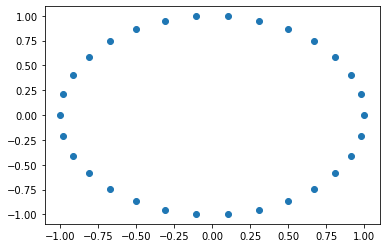

In [5]:
# getting positions of the stations    
N=len(data) # number of stations
sd=0.2 # standard deviation of the sensor noise
x_sensor = np.zeros(N)
y_sensor = np.zeros(N)
for sensor in range(N):
    theta_sensor = 2*np.pi*sensor/N
    x_sensor[sensor] = np.cos(theta_sensor)
    y_sensor[sensor] = np.sin(theta_sensor)

# plotting positions of the stations
plt.scatter(x_sensor, y_sensor)

### Building hypothesis space

In [56]:
# Building hypothesis space
# earthquakes are said to be independent, hence the value function is called independently at every station
print('Building the hypothesis space...')
build = time.time()
hypothesis = np.zeros((S,N))
for s in range(0,S):
    for i in range(N):
        hypothesis[s][i]=value(x[s],y[s],x_sensor[i],y_sensor[i])

v = np.zeros((S,S, N))
for i in range(30):
    for j in range(S):
        for k in range(S):
            #D-value for 2 explosions - V * V.T
            v[j,k,i] = hypothesis[j,i] + hypothesis[k,i] + 0.2*np.random.randn() # explosion value

print('Took',time.time() - build,'seconds to build hypothesis space for 2 earthquakes')



Building the hypothesis space...
Took 8.288915872573853 seconds to build hypothesis space for 2 earthquakes
Took 15.388486862182617 seconds to build hypothesis space for 2 earthquakes
Took 22.131288766860962 seconds to build hypothesis space for 2 earthquakes
Took 28.881224870681763 seconds to build hypothesis space for 2 earthquakes
Took 35.59446692466736 seconds to build hypothesis space for 2 earthquakes
Took 42.19239592552185 seconds to build hypothesis space for 2 earthquakes
Took 48.78396987915039 seconds to build hypothesis space for 2 earthquakes
Took 55.41582489013672 seconds to build hypothesis space for 2 earthquakes
Took 61.98948097229004 seconds to build hypothesis space for 2 earthquakes
Took 68.65791177749634 seconds to build hypothesis space for 2 earthquakes
Took 75.3321008682251 seconds to build hypothesis space for 2 earthquakes
Took 82.0192859172821 seconds to build hypothesis space for 2 earthquakes
Took 88.62616181373596 seconds to build hypothesis space for 2 ear

### Computing/Plotting posterior distribution
Given that prior is uniform, posterior is proportional to the likelihood.

In [80]:
# Determine likelihood, p(location|observed sensor values), given these sensor values
like = np.ones((S,S)) 
for i in range(N):
    like[:, :] *= norm.pdf(v[:,:,i], data[i], sd)
double_sum = like.sum(axis = 1) # summing along one direction in order to marginalise out s2
double_scale = double_sum/double_sum.max()

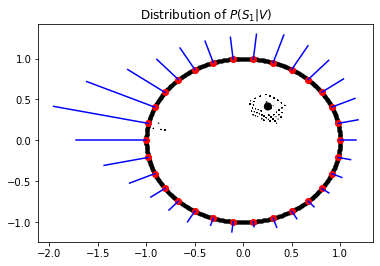

In [87]:
plt.figure()


# plotting posterior distribution of s1
plt.scatter(x, y, s = double_sum*100,zorder = 0, color = "black")

# plottling perimeter
for theta in np.arange(0,2*np.pi,0.01):
    plt.plot(np.cos(theta),np.sin(theta),".",color=[0,0,0])

# plotting station locations
for sensor in range(N):
    plt.plot(x_sensor[sensor],y_sensor[sensor],"o",color=[1,0,0])

# plotting observed values at each sensor (spikes shown in fig (1.3))
for sensor in range(N):
    scale =1
    theta_sensor = 2*np.pi*sensor/N
    base = [x_sensor[sensor],((scaled_data[sensor])*np.cos(theta_sensor))] 
    top = [y_sensor[sensor], ((scaled_data[sensor])*np.sin(theta_sensor))]
    plt.plot(base, top,"-",color='b')


plt.title("Distribution of $P(S_{1}|V)$")
plt.savefig('posterior.png')
plt.show()


# Question 2

### Building hypotheses

In [66]:
# Building hypothesis space for 1 explosion
# earthquakes are said to be independent, hence the value function is called independently at every station
build = time.time()
v_explosion1 = np.zeros((S,N))
for s1 in range(S):
    for i in range(N):
        v_explosion1[s1][i] = value(x[s1],y[s1],x_sensor[i],y_sensor[i]) + sd*np.random.randn() # explosion value
print('Took',time.time() - build,'seconds to build hypothesis space for 1 earthquake')

# Building hypothesis space for 2 explosions - done in question 1
v_explosion2 = v

Took 0.23713421821594238 seconds to build hypothesis space for 1 earthquake


### Computing likelihood for both situations

In [82]:
# for 1 explosion
like_single = np.ones(S)
for i in range(N):
    like_single *= norm.pdf(v_explosion1[:,i], data[i], sd) 
single_sum = like_single.sum()

# for 2 explosions - done above

### Computing log-likelihoods

In [86]:
log_comp = np.log(double_sum.sum()/2000) - np.log(single_sum)
print('The value to report is:',log_comp)
print('The bayes factor is ',np.exp(log_comp))

The value to report is: 676.9970634733385
The bayes factor is  1.0377408939269421e+294


When computing the Bayes Factor, we are assuming that the 2 explosion case is the null hypothesis and the 1 explosion case is the alternate hypothesis. Given the resulting BF of 0.18, we can say that there is moderate evidence for H1, (ie. for a 1 explosion scenario).

# Question 3
see latex

# Question 4
see latex